<a href="https://colab.research.google.com/github/moaaz12-web/Image-generation-and-variation-with-Stable-Diffusion/blob/main/Final_deliverble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.8.0 transformers ftfy accelerate
!pip install  "ipywidgets>=7,<8"
!pip install gradio 

**After this, restart the runtime. By going to "Runtime", and selecting "Restart Runtime". Then, run the cells below**

In [ ]:
import gradio as gr
import inspect
import warnings
import numpy as np
from typing import List, Optional, Union
import requests
from io import BytesIO
from PIL import Image
import torch
from torch import autocast
from tqdm.auto import tqdm
from diffusers import StableDiffusionImg2ImgPipeline

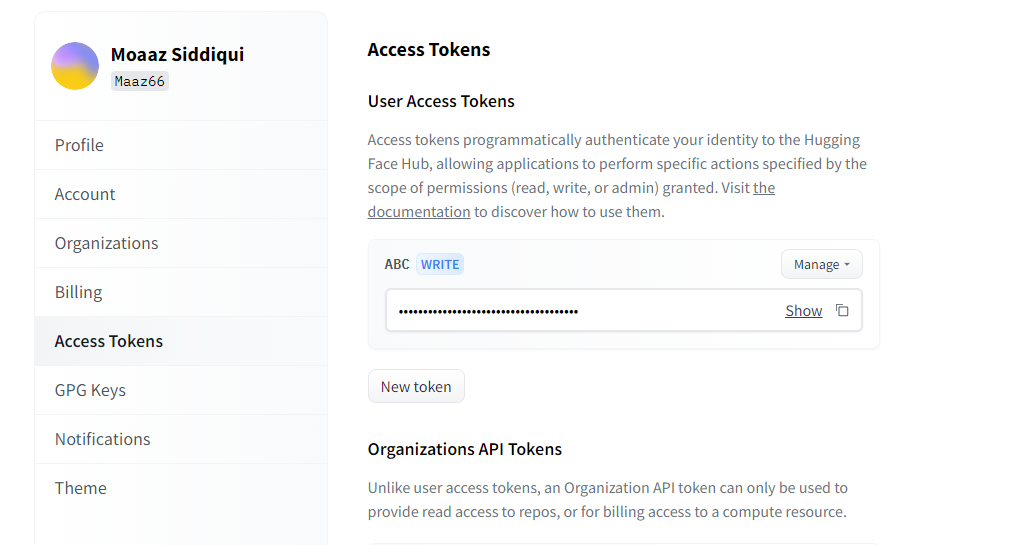

In [ ]:
access_token = "Paste your access token here"
# Go to hugging face, your profile "SETTINGS" options, click on "Access tokens", and then generate ur token from there. Paste it over the top

# load the pipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
use_auth_token=access_token
).to(device)

# WITH MULTIPLE OUTPUTS (SLOWER)

In [ ]:
def generate(img, strength, seed, prompt):


  seed =  int(seed)
  img1 = Image.fromarray(np.asarray(img))

  init_image = img1.resize((768, 512))

  # Create a list to store the 4 output images
  images = []

  with autocast("cuda"):

    # Generate the 4 output images using the pipe function
    for i in range(4):
      generator = torch.Generator(device=device).manual_seed(i+100)

      images.append(pipe(prompt=prompt, init_image=init_image, strength=strength, guidance_scale=7.5, generator=generator, batch_size=128).images[0])

  return [images[0], images[1], images[2], images[3]]

gr.Interface(
    
    generate,
    title = 'Image to Image using Diffusers',
    inputs=[
        gr.Image(elem_id = "input-image"),
        gr.Slider(0, 1, value=0.05, label ="Strength (keep close to 0 for minimal changes)"),
        gr.Number(label = "Seed"),
        gr.Textbox(label="Prompt (leave blank if you want minimal changes)"),
    ],
    outputs = [
        gr.Image(elem_id="output-image"),
                gr.Image(elem_id="output-image"),
                       gr.Image(elem_id="output-image"),
                       gr.Image(elem_id="output-image")

        ], css = "#output-image, #input-image, #image-preview {border-radius: 40px !important; background-color : gray !important;} "
).launch()


# WITH SINGLE OUTPUT (FASTER)

In [ ]:
gr.Interface(
    
    generate,
    title = 'Image to Image using Diffusers',
    inputs=[
        gr.Image(elem_id = "input-image"),
        gr.Slider(0, 1, value=0.05, label ="Strength (keep close to 0 for minimal changes)"),
        gr.Number(label = "Seed"),
        gr.Textbox(label="Prompt (leave blank if you want minimal changes)"),
      
    ],
    outputs = [
        gr.Image(elem_id="output-image")
        ], css = "#output-image, #input-image, #image-preview {border-radius: 40px !important; background-color : gray !important;} "
).launch()
